In [1]:
import pandas as pd
import numpy as np
from pprint import pprint as pp
from sklearn.preprocessing import Imputer 
import os
print()
path = os.getcwd()
df = pd.read_csv(path+'\machine_learning_self_study_udemy\homeMedical\HomeMedical.csv')
pp(df.describe())


       Visit_Status    Time_Delay       City_ID   Patient_Age       Zipcode  \
count  40079.000000  40079.000000  40079.000000  40022.000000  40077.000000   
mean       4.146486     68.011178     69.099279     32.754735   8380.639369   
std        0.654476     40.357691     50.817830     26.230631    508.203299   
min        4.000000      0.000000      1.000000     -5.000000   8004.000000   
25%        4.000000     45.000000     26.000000      8.000000   8186.000000   
50%        4.000000     60.000000     50.000000     32.000000   8222.000000   
75%        4.000000     90.000000    114.000000     51.000000   8521.000000   
max        8.000000    150.000000    194.000000    106.000000  88888.000000   

       ID_Type   ID_Personal  N_Home_Visits  Is_Patient_Minor  
count  40079.0  40079.000000        40079.0      40079.000000  
mean       1.0     54.684972            1.0          1.649243  
std        0.0     19.132697            0.0          0.477213  
min        1.0      0.000000   

In [2]:
## Checking Null value :
_null = df.isnull().sum()
pp(_null)

Visit_Status         0
Time_Delay           0
City                 0
City_ID              0
Patient_Age         57
Zipcode              2
Latitude             0
longitude            0
Pathology            0
Date                 0
ID_Type              0
ID_Personal          0
N_Home_Visits        0
Is_Patient_Minor     0
Geo_Point            0
dtype: int64


In [3]:
## Change Columns Name:
df = df.rename(columns = lambda x: x.lower()) 
pp(df.columns)

Index(['visit_status', 'time_delay', 'city', 'city_id', 'patient_age',
       'zipcode', 'latitude', 'longitude', 'pathology', 'date', 'id_type',
       'id_personal', 'n_home_visits', 'is_patient_minor', 'geo_point'],
      dtype='object')


In [4]:
## Handle Null value at posotion patient_age:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(df.iloc[:,4:5].values)
df['patient_age'] = imp.transform(df.iloc[:,4:5].values)
df['patient_age'] = df['patient_age'].astype(int)

## Again Checking Null Value:
_null = df.isnull().sum()
pp(_null)

## Ignor the Zipcode section :P

visit_status        0
time_delay          0
city                0
city_id             0
patient_age         0
zipcode             2
latitude            0
longitude           0
pathology           0
date                0
id_type             0
id_personal         0
n_home_visits       0
is_patient_minor    0
geo_point           0
dtype: int64
C:\Users\mainakd\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
## Checking Duplicate Values:
_duplicates = df.duplicated()
pp(df[_duplicates])

visit_status  time_delay       city  city_id  patient_age  zipcode  \
10141             5           0    El Prat      101           63   8820.0   
26729             5         150  Barcelona      167           55   8029.0   

          latitude    longitude            pathology           date  id_type  \
10141  41,89533566  2,884770899  CRISIS HIPERTENSIVA  14/4/18 23:29        1   
26729    41,392725  2,147134159                GRIPE  31/1/18 10:04        1   

       id_personal  n_home_visits  is_patient_minor  \
10141            0              1                 2   
26729           66              1                 2   

                                         geo_point  
10141   POINT(2.8847708985515967 41.8953356566738)  
26729  POINT(2.1471341590000557 41.39272500000007)  


In [6]:
## Drop Duplicate Values:
df = df.drop_duplicates()
df = df[df.patient_age != -5]

## Checking Duplicate Value Again:
_duplicates = df.duplicated()
pp(df[_duplicates])


Empty DataFrame
Columns: [visit_status, time_delay, city, city_id, patient_age, zipcode, latitude, longitude, pathology, date, id_type, id_personal, n_home_visits, is_patient_minor, geo_point]
Index: []


In [7]:
## Convert Date to pandas date_time:
df['dateTime'] = pd.to_datetime(df['date'])

## Count no of days present in dataset:
pp(len(df['dateTime'].dt.dayofweek.unique()))

# There are 7 days a week cool :D

7


In [8]:
# List of Unique value presents in column is_patient_minor:
_is_patient_minor = df.is_patient_minor.unique()
pp(_is_patient_minor)

#There are two fields related to the is_patient_minor 
#  When is_patient_minor is 1 the patient is under age(UAP).
#  When is_patient_minor is 2 the patient is over age(OAP).


array([2, 1], dtype=int64)


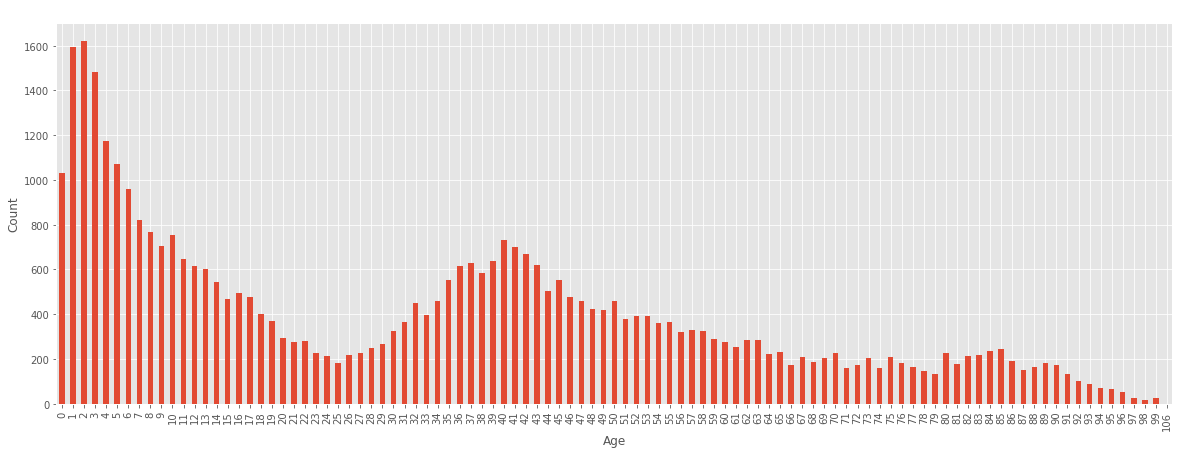

In [9]:
## Time to analysis:
# Patient age Wise Count :
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_patient_age_wise = df.groupby(df['patient_age']).size()
_patient_age_wise.plot(kind = 'bar', alpha =1, figsize = (20,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Patient age density')
plt.show()

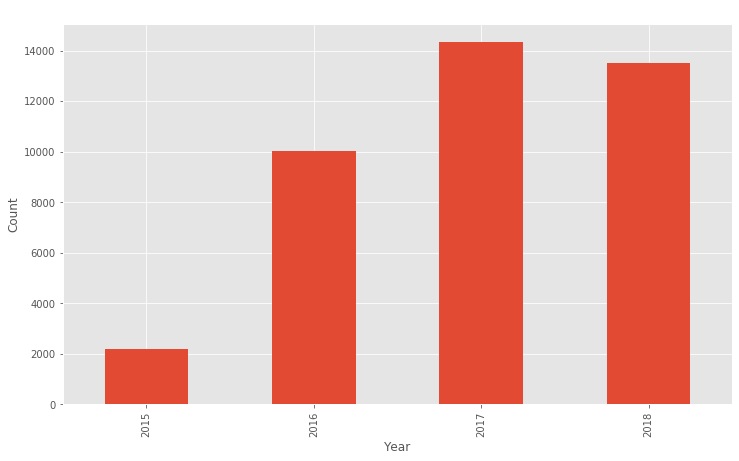

In [10]:
# Year wise Vists:
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_year_wise = df.groupby(df['dateTime'].dt.year).count().date
_year_wise.plot(kind='bar', alpha = 1, figsize = (12,7))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Visits Per Year')
plt.show()


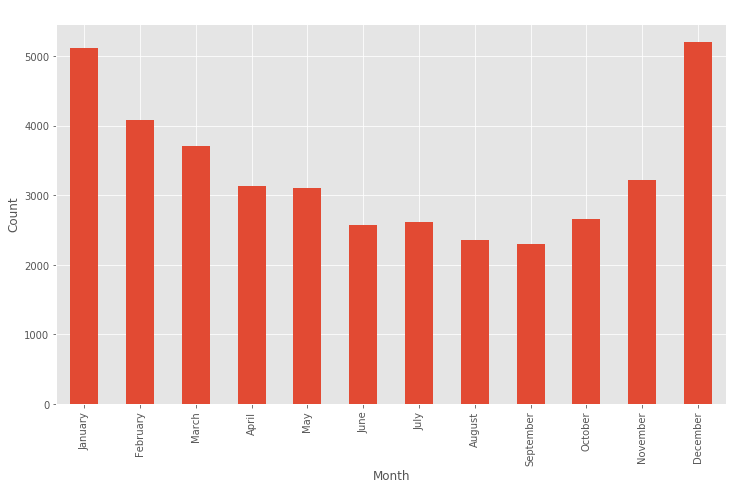

In [11]:
# Month wise Visits:
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_month_wise = df.groupby(df['dateTime'].dt.month).count().date
_month_wise.plot(kind = 'bar',alpha = 1, figsize = (12,7))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Visits Per Month')
plt.xticks(np.arange(0,12), [calendar.month_name[x] for x in range(1,13)])
plt.show()


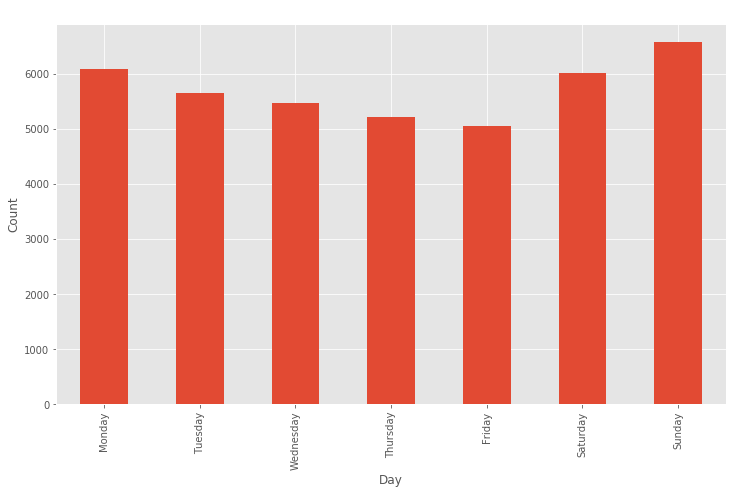

In [12]:
# Day wise Visits:
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_day_wise = df.groupby(df['dateTime'].dt.dayofweek).count().date
_day_wise.index = [calendar.day_name[x] for x in range(0,7)]
_day_wise.plot(kind = 'bar', alpha = 1, figsize = (12,7))
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Visits per day')
plt.show()

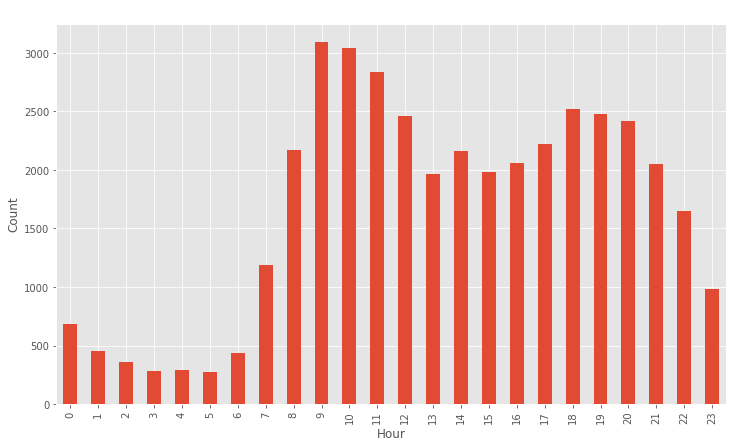

In [13]:
## Per hour wise visits:
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_hour_wise = df.groupby(df['dateTime'].dt.hour).count().date
_hour_wise.plot(kind = 'bar', alpha = 1, figsize = (12,7))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Visits per Hour')
plt.show()

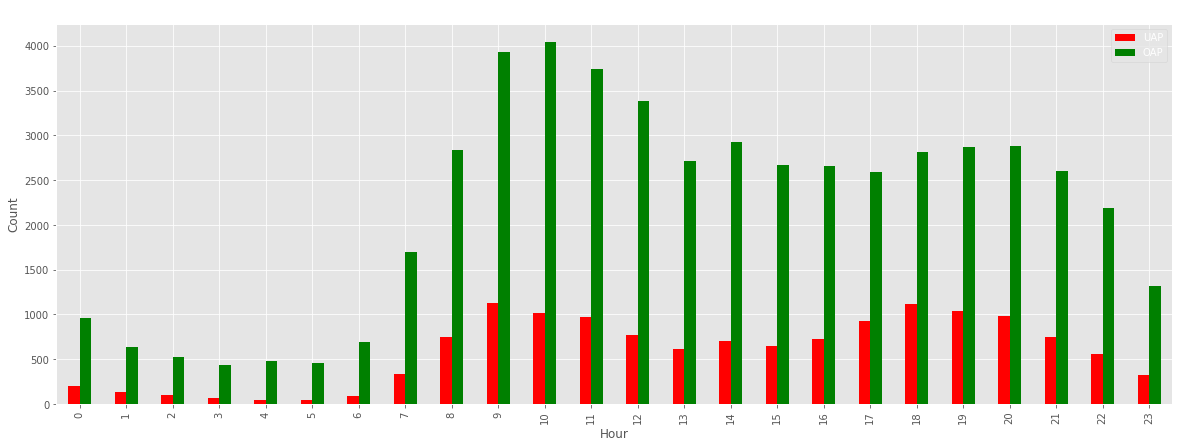

In [14]:
## Per hour UAP(under age patient) and OAP(Over age patient) visits:
import matplotlib.pyplot as plt
import calendar
plt.style.use('ggplot')
_hourwise_UAP_visits = df[df['is_patient_minor'] != 2].groupby(df['dateTime'].dt.hour).sum().is_patient_minor

_hourwise_OAP_visits = df[df['is_patient_minor'] != 1].groupby(df['dateTime'].dt.hour).sum().is_patient_minor

rate = pd.DataFrame({'UAP': _hourwise_UAP_visits, 'OAP': _hourwise_OAP_visits})
rate.plot(kind = 'bar', color = ['red', 'green'], alpha = 1, figsize = (20,7))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Per hour UAP(under age patient) and OAP(Over age patient) visits')
plt.show()


In [15]:
# Analysis Location:
def coordinates(value):
    if type(value) == str:
        return value.replace(',', '.')
    return value
df.latitude = df.latitude.apply(lambda x: coordinates(x))
df.longitude = df.longitude.apply(lambda x: coordinates(x))
pp(df.latitude.head())
pp(df.longitude.head())

0      41.565505
1       41.47367
2       41.46767
3    41.53951204
4    41.54251204
Name: latitude, dtype: object
0    2.234999575
1        2.08933
2        2.09033
3    2.122511839
4    2.118511839
Name: longitude, dtype: object


In [17]:
import folium 
from folium import plugins
from folium.plugins import FastMarkerCluster
folium_map = folium.Map(location = [41.38879, 2.15899], zoom_start = 12 )
df = df.sample(1000)
FastMarkerCluster(data=list(zip(df['latitude'].values, df['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
for lat, lng, label in zip(df.latitude, df.longitude, df.is_patient_minor.astype(str)):
    if label != '0':
        folium.CircleMarker(
            [lat,lng],
            radius = 3,
            color = 'red',
            fill = True,
            popup = label,
            fill_colored = "#007849",
            fill_opacity = 0.6
        ).add_to(folium_map)
folium_map